In [1]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

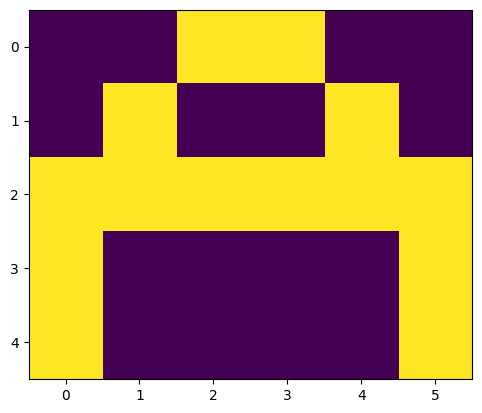

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [3]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
                                np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [4]:
# activation function
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)    # input from layer 1 
	a1 = sigmoid(z1)  # out put of layer 2 
	z2 = a1.dot(w2)   # input of out layer
	a2 = sigmoid(z2)  # output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	li =[]
	for i in range(x * y):
		li.append(np.random.randn())
	return(np.array(li).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)
	a1 = sigmoid(z1) 
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)
	
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))
	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

In [5]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

print(w1, "\n\n", w2)

[[ 0.6006116  -0.39495578  1.13196835  0.1947622  -0.10662618]
 [-0.37511904 -0.50244705  0.01864301 -0.41515652  0.76367884]
 [-0.38380812 -0.1290292  -1.23220785 -0.20921902 -1.29347218]
 [-0.04232712  0.02010632  1.32513625 -0.6126832   0.19192709]
 [-1.61874617  0.66220142  1.10744342 -0.30503514  0.66245764]
 [-0.40777438  0.07256134 -0.87030721  1.10134601  0.43667861]
 [-0.03241536 -2.03701803  0.38013727  1.1833205   0.40569244]
 [ 1.44291967 -0.87832025  1.76353527 -1.35502773 -0.96138066]
 [-0.38159317  1.13285333  0.68257462 -1.40884312  0.48828121]
 [ 2.06878345 -0.3127858   0.79289323  0.13689565 -0.33081273]
 [-0.52372202 -0.18728072  0.43577    -0.66142378  0.65909543]
 [-0.29000959 -1.78457075 -0.19663466 -0.05905867 -1.3446252 ]
 [ 0.83289729 -0.81778431  0.1219609  -0.47558794  0.86942067]
 [ 0.16231316 -0.21090285  1.25930081  0.38914206 -0.13519012]
 [-0.29525723  1.0046202  -0.07646513  0.84157378  0.36192674]
 [-0.21643617 -0.79714477 -0.92582348  1.44860351 -1.36

In [6]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 64.20610362657293
epochs: 2 ======== acc: 66.86072400616017
epochs: 3 ======== acc: 69.27421448043664
epochs: 4 ======== acc: 71.42536940048328
epochs: 5 ======== acc: 73.31486408836057
epochs: 6 ======== acc: 74.95262329493136
epochs: 7 ======== acc: 76.35643581481023
epochs: 8 ======== acc: 77.55383800587214
epochs: 9 ======== acc: 78.57875416348449
epochs: 10 ======== acc: 79.46484550586467
epochs: 11 ======== acc: 80.24093870764088
epochs: 12 ======== acc: 80.92981553527278
epochs: 13 ======== acc: 81.54889706767185
epochs: 14 ======== acc: 82.11143796652411
epochs: 15 ======== acc: 82.6276116918973
epochs: 16 ======== acc: 83.10533547688519
epochs: 17 ======== acc: 83.55085664336073
epochs: 18 ======== acc: 83.96915988729076
epochs: 19 ======== acc: 84.36425022900828
epochs: 20 ======== acc: 84.7393530091237
epochs: 21 ======== acc: 85.09706035490517
epochs: 22 ======== acc: 85.43944438931196
epochs: 23 ======== acc: 85.76815049238895
epochs: 24 ======== ac

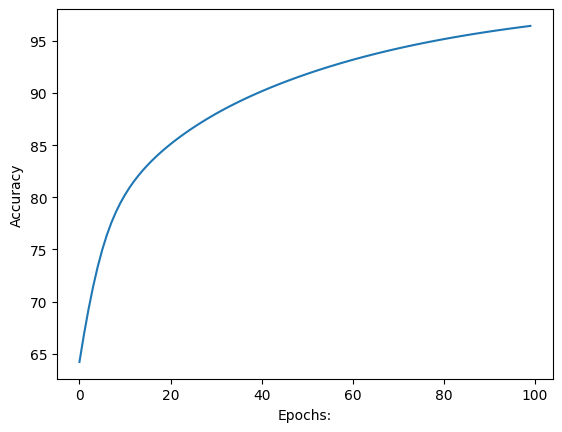

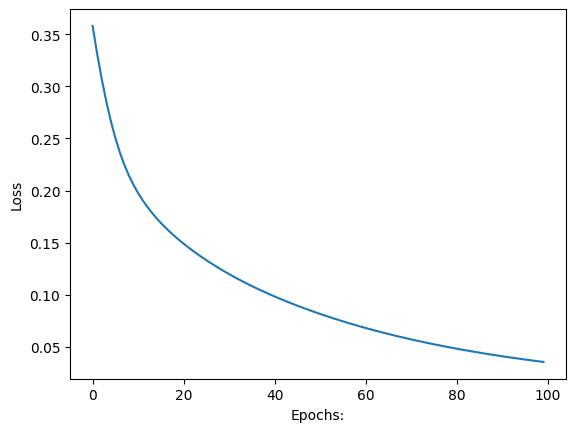

In [7]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

Image is of letter B.


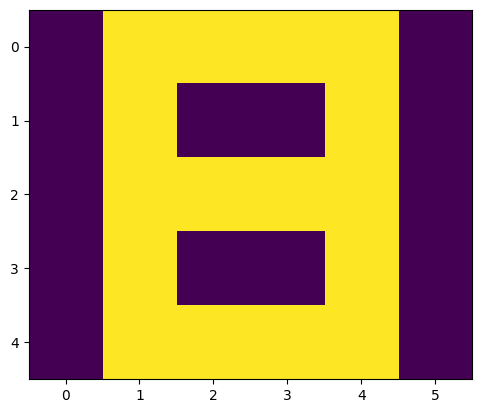

In [8]:
def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 
# Example: Predicting for letter 'B'	
predict(x[1], w1, w2)